In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

In [2]:
path = r'C:\Users\Nbdav\World Happiness analysis'

In [3]:
#importing data sets
df_world = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'world_hap.csv'), index_col = False)

In [4]:
#importing data sets
df_21 = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'world_hap_21.csv'), index_col = False)

In [5]:
df_world.shape

(1949, 13)

In [16]:
df_world.isnull().sum()

Unnamed: 0                        0
Country name                      0
year                              0
Ladder score                      0
Loggged GDP per capita           36
Social support                   13
Healthy life expectancy          55
Freedom to make life choices     32
Generosity                       89
Perceptions of corruption       110
Positive affect                  22
Negative affect                  16
Happiness                         0
dtype: int64

In [26]:
df_world.dropna(inplace = True)

In [27]:
df_world.isnull().sum()

Unnamed: 0                      0
Country name                    0
year                            0
Ladder score                    0
Loggged GDP per capita          0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Positive affect                 0
Negative affect                 0
Happiness                       0
dtype: int64

In [6]:
df_world

,Unnamed: 0,Country name,year,Ladder score,Loggged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Happiness
0,0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Low Happiness
1,1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Low Happiness
2,2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Low Happiness
3,3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Low Happiness
4,4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Low Happiness
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Low Happiness
1945,1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Low Happiness
1946,1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Low Happiness
1947,1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Low Happiness


In [7]:
df_21

,Unnamed: 0,Country name,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness
0,0,Finland,2021,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,High Happiness
1,1,Denmark,2021,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,High Happiness
2,2,Switzerland,2021,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,High Happiness
3,3,Iceland,2021,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,High Happiness
4,4,Netherlands,2021,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,High Happiness
...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,Lesotho,2021,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,Low Happiness
145,145,Botswana,2021,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,Low Happiness
146,146,Rwanda,2021,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,Low Happiness
147,147,Zimbabwe,2021,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,Low Happiness


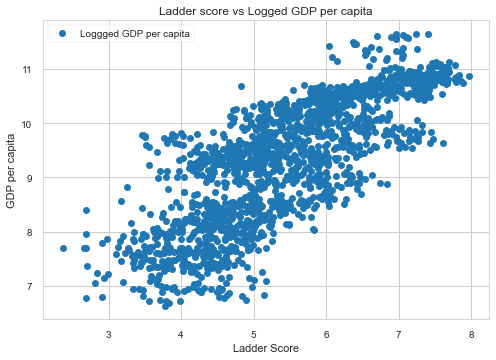

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_world.plot(x = 'Ladder score', y='Loggged GDP per capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Ladder score vs Logged GDP per capita')  
plt.xlabel('Ladder Score')  
plt.ylabel('GDP per capita')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_world['Ladder score'].values.reshape(-1,1)
y = df_world['Loggged GDP per capita'].values.reshape(-1,1)

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

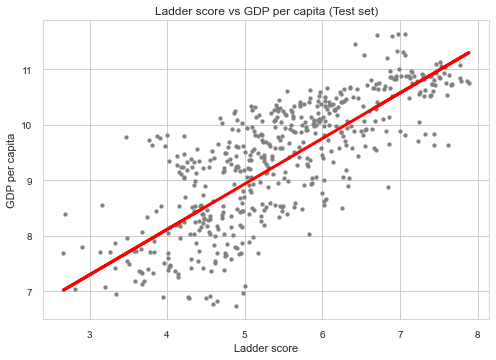

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ladder score vs GDP per capita (Test set)')
plot_test.xlabel('Ladder score')
plot_test.ylabel('GDP per capita')
plot_test.show()

In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.81942316]]
Mean squared error:  0.5089346884191084
R2 score:  0.5896232490302915


In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.222,8.498151
1,7.718,7.405860
2,8.068,7.850807
3,8.965,9.098788
4,9.931,10.277938
5,10.530,10.491807
6,8.904,8.521914
7,7.849,8.747256
8,8.450,8.003219
9,10.608,10.918727


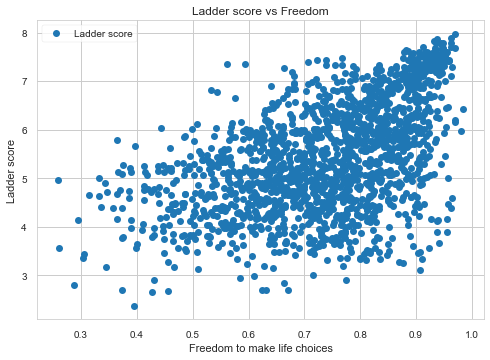

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_world.plot(x = 'Freedom to make life choices', y='Ladder score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Ladder score vs Freedom')  
plt.xlabel('Freedom to make life choices')  
plt.ylabel('Ladder score')  
plt.show()

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_world['Freedom to make life choices'].values.reshape(-1,1)
y = df_world['Ladder score'].values.reshape(-1,1)

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

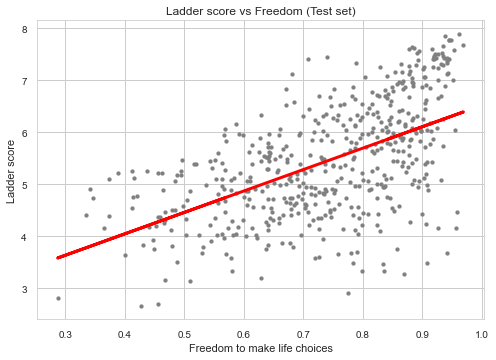

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ladder score vs Freedom (Test set)')
plot_test.xlabel('Freedom to make life choices')
plot_test.ylabel('Ladder score')
plot_test.show()

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.464,4.736609
1,3.131,4.493538
2,3.674,6.273313
3,5.197,6.129118
4,6.636,5.634736
5,6.897,6.129118
6,4.493,4.390541
7,4.768,5.243350
8,3.860,5.185672
9,7.418,6.277433


# as we can see GDP and freedom both have a positve slope when compared to the Happineses ladder score but there is going to have to be other dimensions to this model to better predict ladder score.
